   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000  

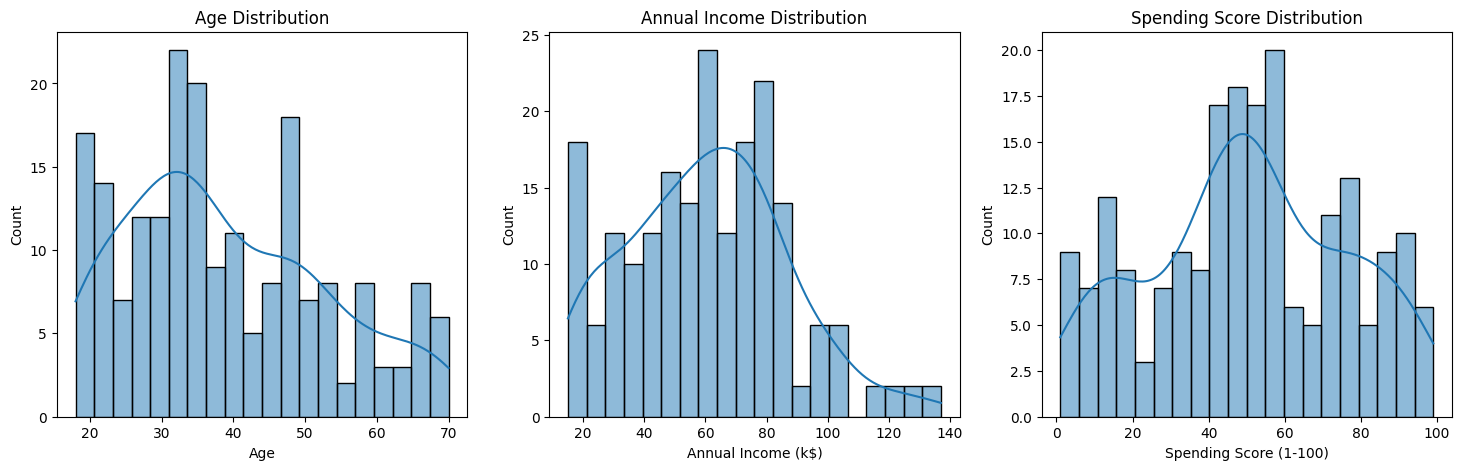

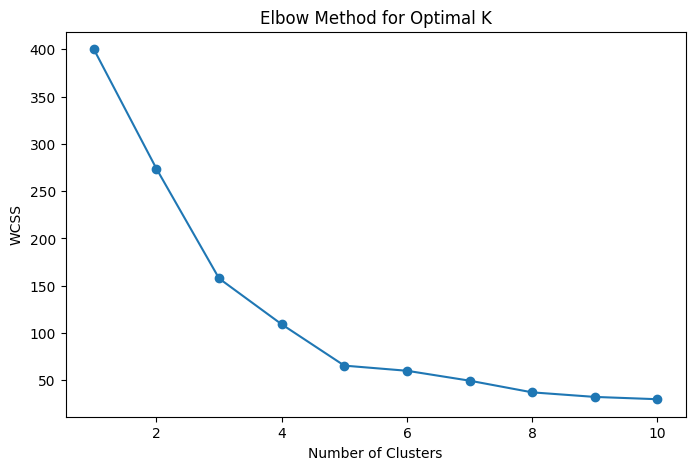

Silhouette Score: 0.555


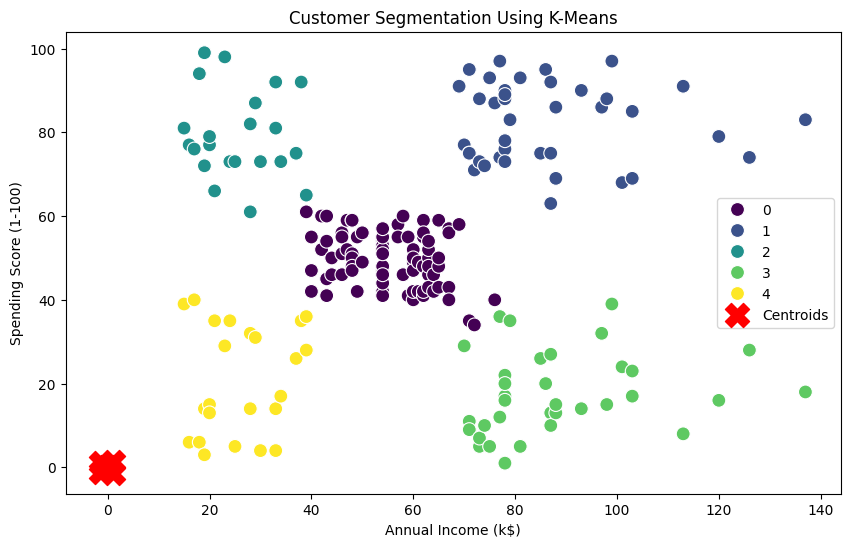

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("C:\\Users\\DELL\\Documents\\analyst\\Mall_Customers.csv")  # Ensure the file is in the same directory

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Exploratory Data Analysis (EDA)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Annual Income Distribution")

sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Spending Score Distribution")

plt.show()

# Select relevant features for clustering and scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with optimal K (assume K=5 from elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans

# Compute silhouette score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=y_kmeans, palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation Using K-Means')
plt.legend()
plt.show()

# Save clustered dataset
df.to_csv("Clustered_Customers.csv", index=False)


In [1]:
import pandas as pd

# Load the file and check the first few rows
df = pd.read_csv("Clustered_Customers.csv")
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
